In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
df = pd.read_csv('/kaggle/input/parkinson-dataset/parkinsons.csv')
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [2]:
df.drop(columns="name",axis=1,inplace=True)
df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [3]:
# Count the levels in the 'Category' column
level_counts = df["status"].value_counts()

# Print the results
print("Level Counts:")
print(level_counts)

Level Counts:
status
1    147
0     48
Name: count, dtype: int64


Outlier detection

Text(0.5, 1.0, 'PPE')

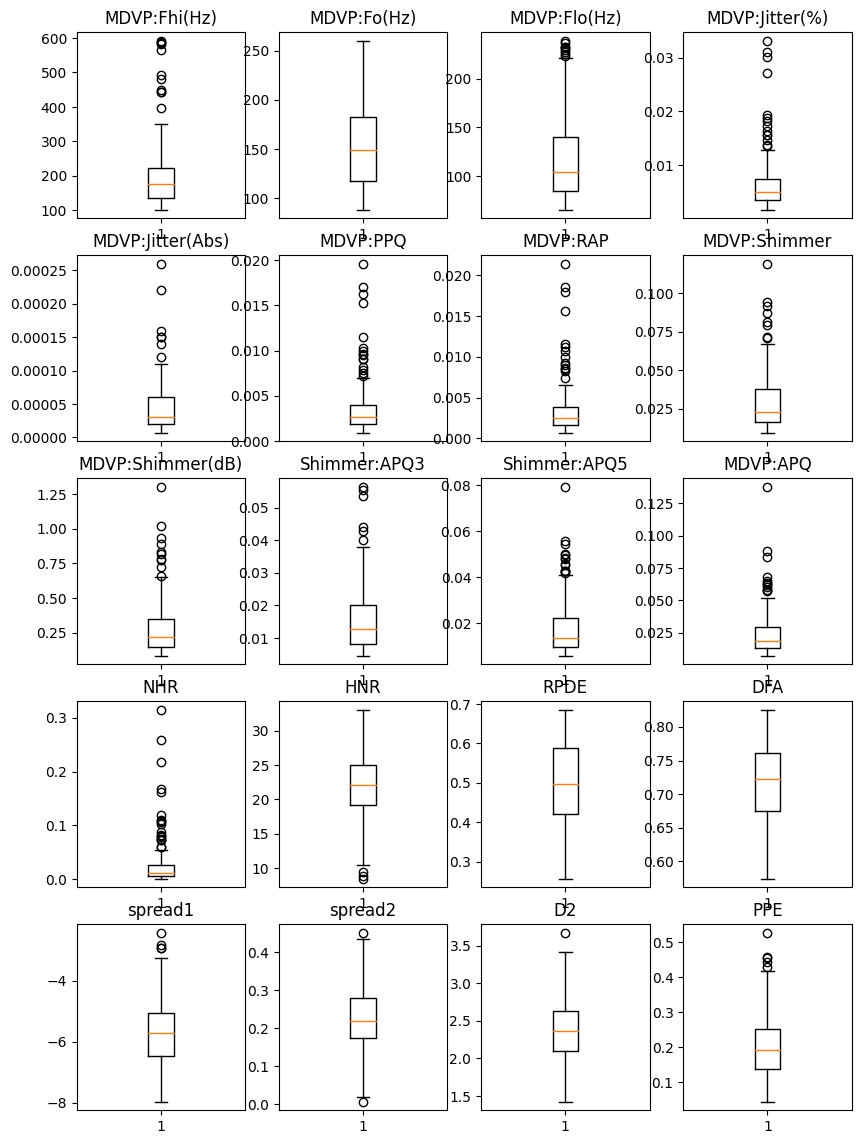

In [4]:
import matplotlib.pyplot as plt
fig, ax= plt.subplots(5, 4, figsize=(10, 14))
ax[0,0].boxplot(x='MDVP:Fhi(Hz)', data=df)
ax[0, 0].set_title('MDVP:Fhi(Hz)')


ax[0,1].boxplot(x='MDVP:Fo(Hz)', data=df)
ax[0,1].set_title('MDVP:Fo(Hz)')

ax[0,2].boxplot(x='MDVP:Flo(Hz)', data=df)
ax[0,2].set_title('MDVP:Flo(Hz)')

ax[0,3].boxplot(x='MDVP:Jitter(%)', data=df)
ax[0,3].set_title('MDVP:Jitter(%)')


ax[1,0].boxplot(x='MDVP:Jitter(Abs)', data=df)
ax[1,0].set_title('MDVP:Jitter(Abs)')

ax[1,1].boxplot(x='MDVP:PPQ', data=df)
ax[1,1].set_title('MDVP:PPQ')

ax[1,2].boxplot(x='MDVP:RAP', data=df)
ax[1,2].set_title('MDVP:RAP')

ax[1,3].boxplot(x='MDVP:Shimmer', data=df)
ax[1,3].set_title('MDVP:Shimmer')


ax[2,0].boxplot(x='MDVP:Shimmer(dB)', data=df)
ax[2,0].set_title('MDVP:Shimmer(dB)')


    
ax[2,1].boxplot(x='Shimmer:APQ3', data=df)
ax[2,1].set_title('Shimmer:APQ3')

ax[2,2].boxplot(x='Shimmer:APQ5', data=df)
ax[2,2].set_title('Shimmer:APQ5')


ax[2,3].boxplot(x='MDVP:APQ', data=df)
ax[2,3].set_title('MDVP:APQ')



ax[3,0].boxplot(x='NHR', data=df)
ax[3,0].set_title('NHR')
ax[3,1].boxplot(x='HNR', data=df)
ax[3,1].set_title('HNR')
ax[3,2].boxplot(x='RPDE', data=df)
ax[3,2].set_title('RPDE')
ax[3,3].boxplot(x='DFA', data=df)
ax[3,3].set_title('DFA')

ax[4,0].boxplot(x='spread1', data=df)
ax[4,0].set_title('spread1')
ax[4,1].boxplot(x='spread2', data=df)
ax[4,1].set_title('spread2')
ax[4,2].boxplot(x='D2', data=df)
ax[4,2].set_title('D2')
ax[4,3].boxplot(x='PPE', data=df)
ax[4,3].set_title('PPE')

Outliers fix

In [5]:
Q1=df.PPE.quantile(0.25)
Q3=df.PPE.quantile(0.75)
IQR=Q3-Q1

df=df[~((df.PPE < (Q1 -1.5*IQR)) | (df.PPE > (Q3 + 1.5 * IQR)))]
df


Q1=df.D2.quantile(0.25)
Q3=df.D2.quantile(0.75)
IQR=Q3-Q1

df=df[~((df.D2 < (Q1 -1.5*IQR)) | (df.D2 > (Q3 + 1.5 * IQR)))]
df

Q1 = df['MDVP:APQ'].quantile(0.25)
Q3 = df['MDVP:APQ'].quantile(0.75)
IQR=Q3-Q1

df = df[~((df['MDVP:APQ'] < (Q1 - 1.5 * IQR)) | (df['MDVP:APQ'] > (Q3 + 1.5 * IQR)))]
df


Q1 = df['MDVP:Jitter(%)'].quantile(0.25)
Q3 = df['MDVP:Jitter(%)'].quantile(0.75)
IQR=Q3-Q1

df = df[~((df['MDVP:Jitter(%)'] < (Q1 - 1.5 * IQR)) | (df['MDVP:Jitter(%)'] > (Q3 + 1.5 * IQR)))]
df

Q1 = df['Shimmer:APQ5'].quantile(0.25)
Q3 = df['Shimmer:APQ5'].quantile(0.75)
IQR=Q3-Q1

df = df[~((df['Shimmer:APQ5'] < (Q1 - 1.5 * IQR)) | (df['Shimmer:APQ5'] > (Q3 + 1.5 * IQR)))]
df

Q1 = df['Shimmer:APQ3'].quantile(0.25)
Q3 = df['Shimmer:APQ3'].quantile(0.75)
IQR=Q3-Q1

df = df[~((df['Shimmer:APQ3'] < (Q1 - 1.5 * IQR)) | (df['Shimmer:APQ3'] > (Q3 + 1.5 * IQR)))]
df


Q1 = df['MDVP:Shimmer'].quantile(0.25)
Q3 = df['MDVP:Shimmer'].quantile(0.75)
IQR=Q3-Q1

df = df[~((df['MDVP:Shimmer'] < (Q1 - 1.5 * IQR)) | (df['MDVP:Shimmer'] > (Q3 + 1.5 * IQR)))]
df

Q1 = df['MDVP:RAP'].quantile(0.25)
Q3 = df['MDVP:RAP'].quantile(0.75)
IQR=Q3-Q1

df = df[~((df['MDVP:RAP'] < (Q1 - 1.5 * IQR)) | (df['MDVP:RAP'] > (Q3 + 1.5 * IQR)))]
df

Q1 = df['MDVP:PPQ'].quantile(0.25)
Q3 = df['MDVP:PPQ'].quantile(0.75)
IQR=Q3-Q1

df = df[~((df['MDVP:PPQ'] < (Q1 - 1.5 * IQR)) | (df['MDVP:PPQ'] > (Q3 + 1.5 * IQR)))]
df

Q1 = df['MDVP:Jitter(Abs)'].quantile(0.25)
Q3 = df['MDVP:Jitter(Abs)'].quantile(0.75)
IQR=Q3-Q1

df = df[~((df['MDVP:Jitter(Abs)'] < (Q1 - 1.5 * IQR)) | (df['MDVP:Jitter(Abs)'] > (Q3 + 1.5 * IQR)))]
df

Q1 = df['MDVP:Jitter(Abs)'].quantile(0.25)
Q3 = df['MDVP:Jitter(Abs)'].quantile(0.75)
IQR=Q3-Q1

df = df[~((df['MDVP:Jitter(Abs)'] < (Q1 - 1.5 * IQR)) | (df['MDVP:Jitter(Abs)'] > (Q3 + 1.5 * IQR)))]
df


Q1 = df['MDVP:Flo(Hz)'].quantile(0.25)
Q3 = df['MDVP:Flo(Hz)'].quantile(0.75)
IQR=Q3-Q1

df = df[~((df['MDVP:Flo(Hz)'] < (Q1 - 1.5 * IQR)) | (df['MDVP:Flo(Hz)'] > (Q3 + 1.5 * IQR)))]
df


Q1 = df['MDVP:Fhi(Hz)'].quantile(0.25)
Q3 = df['MDVP:Fhi(Hz)'].quantile(0.75)
IQR=Q3-Q1

df = df[~((df['MDVP:Fhi(Hz)'] < (Q1 - 1.5 * IQR)) | (df['MDVP:Fhi(Hz)'] > (Q3 + 1.5 * IQR)))]
df


Q1 = df['NHR'].quantile(0.25)
Q3 = df['NHR'].quantile(0.75)
IQR=Q3-Q1

df = df[~((df['NHR'] < (Q1 - 1.5 * IQR)) | (df['NHR'] > (Q3 + 1.5 * IQR)))]
df

Q1 = df['spread1'].quantile(0.25)
Q3 = df['spread1'].quantile(0.75)
IQR=Q3-Q1

df = df[~((df['spread1'] < (Q1 - 1.5 * IQR)) | (df['spread1'] > (Q3 + 1.5 * IQR)))]
df

Q1 = df['spread2'].quantile(0.25)
Q3 = df['spread2'].quantile(0.75)
IQR=Q3-Q1

df = df[~((df['spread2'] < (Q1 - 1.5 * IQR)) | (df['spread2'] > (Q3 + 1.5 * IQR)))]
df

Q1 = df['D2'].quantile(0.25)
Q3 = df['D2'].quantile(0.75)
IQR=Q3-Q1

df = df[~((df['D2'] < (Q1 - 1.5 * IQR)) | (df['D2'] > (Q3 + 1.5 * IQR)))]
df



Q1 = df['PPE'].quantile(0.25)
Q3 = df['PPE'].quantile(0.75)
IQR=Q3-Q1

df = df[~((df['PPE'] < (Q1 - 1.5 * IQR)) | (df['PPE'] > (Q3 + 1.5 * IQR)))]
df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
6,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,0.140,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,0.134,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,0.191,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,0.255,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,116.848,217.552,99.503,0.00531,0.00005,0.00260,0.00346,0.00780,0.01795,0.163,...,0.02429,0.01179,22.085,0,0.663842,0.656516,-5.198864,0.206768,2.120412,0.252404
185,116.286,177.291,96.983,0.00314,0.00003,0.00134,0.00192,0.00403,0.01564,0.136,...,0.02001,0.00737,24.199,0,0.598515,0.654331,-5.592584,0.133917,2.058658,0.214346
188,114.563,119.167,86.647,0.00327,0.00003,0.00146,0.00184,0.00439,0.01185,0.106,...,0.01672,0.00703,24.775,0,0.555303,0.659132,-6.710219,0.149694,1.913990,0.121777
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050


In [6]:
X = df.drop(columns=['status'])  # Drop target column
y = df['status']                # Target column

print(y.shape)
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


(126,)


Augmentation for imbalanced data

In [7]:
# Separate features (X) and target (y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=50)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Display resampled dataset shape
print("\nResampled Training Dataset Shape:")
print(pd.Series(y_train_resampled).value_counts())

# Verify the data distribution
print("\nOriginal Dataset Class Distribution:")
print(y.value_counts())
print("\nBalanced Dataset Class Distribution (Train):")
print(pd.Series(y_train_resampled).value_counts())


Resampled Training Dataset Shape:
status
0    75
1    75
Name: count, dtype: int64

Original Dataset Class Distribution:
status
1    94
0    32
Name: count, dtype: int64

Balanced Dataset Class Distribution (Train):
status
0    75
1    75
Name: count, dtype: int64


Without SMOT

Training Logistic Regression...
Training Decision Tree...
Training Random Forest...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Support Vector Machine...
Training Naive Bayes...
Training K-Nearest Neighbors...
Training XGBoost...

Model Comparison:
                    Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0     Logistic Regression  0.807692   0.799825  0.807692  0.788504  0.819549
1           Decision Tree  0.884615   0.919231  0.884615  0.889851  0.921053
2           Random Forest  0.807692   0.800641  0.807692  0.802761  0.939850
3  Support Vector Machine  0.730769   0.534024  0.730769  0.617094  0.533835
4             Naive Bayes  0.653846   0.848558  0.653846  0.667858  0.796992
5     K-Nearest Neighbors  0.730769   0.719231  0.730769  0.723866  0.808271
6                 XGBoost  0.807692   0.800641  0.807692  0.802761  0.909774


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


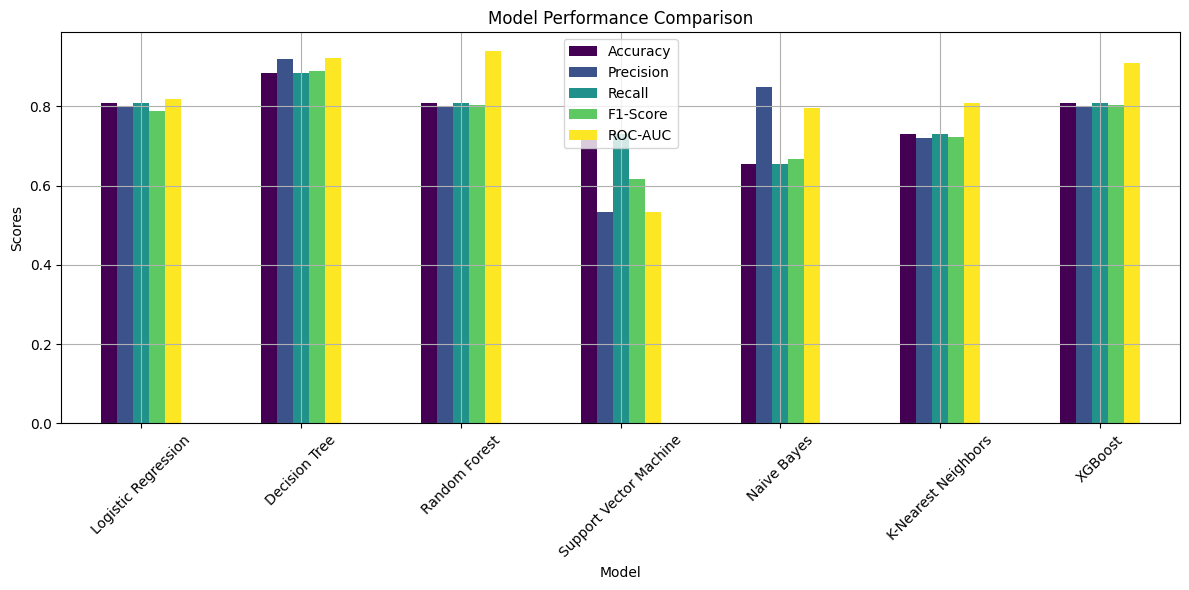

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Load your dataset
# Replace with your dataset


# List of models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Support Vector Machine": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(eval_metric="mlogloss")
}

# DataFrame to store results
results = []

# Evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # ROC-AUC
    if y_prob is not None:
        if y_prob.shape[1] == 2:  # Binary classification
            roc_auc = roc_auc_score(y_test, y_prob[:, 1])  # Use probabilities for positive class
        else:  # Multiclass classification
            roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
    else:
        roc_auc = np.nan

    # Append results
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc
    })
# Convert results to a DataFrame for easy comparison
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df)

# Plot the results (optional)
import seaborn as sns
import matplotlib.pyplot as plt

results_df.set_index("Model", inplace=True)
results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', grid=True)
plt.title("Model Performance Comparison")
plt.ylabel("Scores")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

With SMOT

Training Logistic Regression (Baseline)...
Performing GridSearch for Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training Decision Tree (Baseline)...
Performing GridSearch for Decision Tree...
Training Random Forest (Baseline)...
Performing GridSearch for Random Forest...
Training Support Vector Machine (Baseline)...
Performing GridSearch for Support Vector Machine...
Training Naive Bayes (Baseline)...
Training K-Nearest Neighbors (Baseline)...
Performing GridSearch for K-Nearest Neighbors...
Training XGBoost (Baseline)...
Performing GridSearch for XGBoost...

Comparison of Baseline and Tuned Models:
                    Model  Accuracy_Baseline  Precision_Baseline  \
0     Logistic Regression           0.807692            0.846635   
1           Decision Tree           0.769231            0.794369   
2           Random Forest           0.846154            0.867270   
3  Support Vector Machine           0.653846            0.669338   
4     K-Nearest Neighbors           0.730769            0.813187   
5                 XGBoost           0.884615            0.892094   

   Recall_Baseline  F1-Score

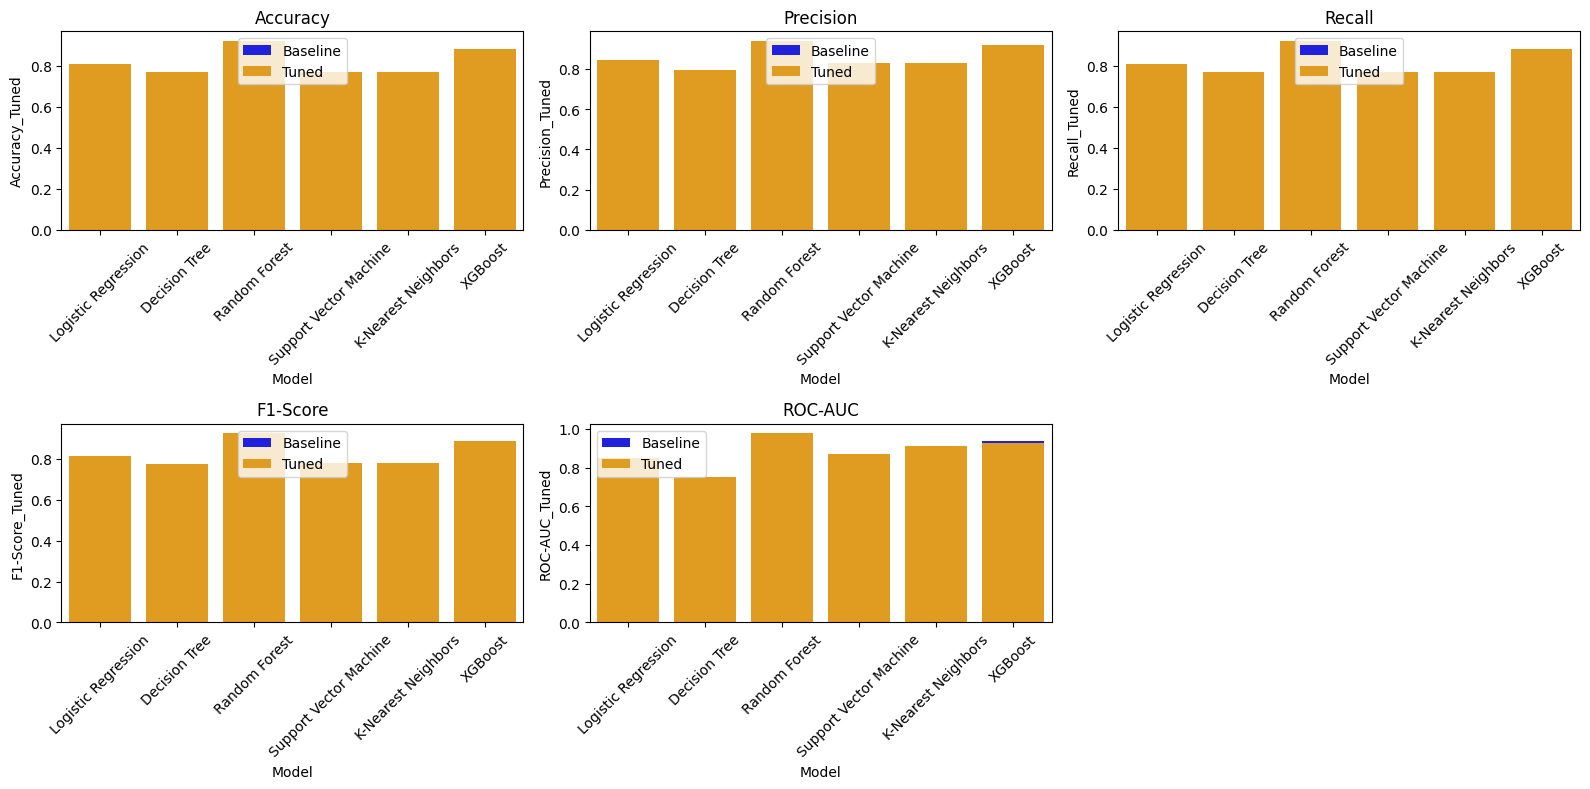

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Replace with your dataset loading logic
# X_train_resampled, y_train_resampled, X_test, y_test must already be prepared

# List of models and their GridSearch parameters
models = {
    "Logistic Regression": (LogisticRegression(max_iter=200), {
        "C": [0.01, 0.1, 1, 10],
        "solver": ["liblinear", "lbfgs"]
    }),
    "Decision Tree": (DecisionTreeClassifier(), {
        "max_depth": [3, 5, 10, None],
        "min_samples_split": [2, 5, 10]
    }),
    "Random Forest": (RandomForestClassifier(n_estimators=100), {
        "n_estimators": [50, 100, 200],
        "max_depth": [5, 10, None]
    }),
    "Support Vector Machine": (SVC(probability=True), {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"]
    }),
    "Naive Bayes": (GaussianNB(), {}),  # No hyperparameters for tuning
    "K-Nearest Neighbors": (KNeighborsClassifier(), {
        "n_neighbors": [3, 5, 7],
        "weights": ["uniform", "distance"]
    }),
    "XGBoost": (XGBClassifier(eval_metric="mlogloss"), {
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 10],
        "n_estimators": [50, 100, 200]
    })
}

# DataFrame to store results
baseline_results = []
tuned_results = []

# Evaluate each model
for model_name, (model, param_grid) in models.items():
    print(f"Training {model_name} (Baseline)...")
    model.fit(X_train_resampled, y_train_resampled)

    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

    # Metrics for Baseline
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = (
        roc_auc_score(y_test, y_prob[:, 1]) if y_prob is not None and y_prob.shape[1] == 2
        else roc_auc_score(y_test, y_prob, multi_class="ovr") if y_prob is not None
        else np.nan
    )
    baseline_results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc
    })

    # Hyperparameter Tuning
    if param_grid:
        print(f"Performing GridSearch for {model_name}...")
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train_resampled, y_train_resampled)
        best_model = grid_search.best_estimator_

        # Predictions with Tuned Model
        y_pred_tuned = best_model.predict(X_test)
        y_prob_tuned = best_model.predict_proba(X_test) if hasattr(best_model, "predict_proba") else None

        # Metrics for Tuned Model
        accuracy = accuracy_score(y_test, y_pred_tuned)
        precision = precision_score(y_test, y_pred_tuned, average='weighted')
        recall = recall_score(y_test, y_pred_tuned, average='weighted')
        f1 = f1_score(y_test, y_pred_tuned, average='weighted')
        roc_auc = (
            roc_auc_score(y_test, y_prob_tuned[:, 1]) if y_prob_tuned is not None and y_prob_tuned.shape[1] == 2
            else roc_auc_score(y_test, y_prob_tuned, multi_class="ovr") if y_prob_tuned is not None
            else np.nan
        )
        tuned_results.append({
            "Model": model_name,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1,
            "ROC-AUC": roc_auc
        })

# Convert results to DataFrames
baseline_df = pd.DataFrame(baseline_results)
tuned_df = pd.DataFrame(tuned_results)

# Merge results for comparison
comparison_df = baseline_df.merge(tuned_df, on="Model", suffixes=("_Baseline", "_Tuned"))

print("\nComparison of Baseline and Tuned Models:")
print(comparison_df)

# Plot the results
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]

plt.figure(figsize=(16, 8))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    sns.barplot(data=comparison_df, x="Model", y=f"{metric}_Baseline", color="blue", label="Baseline")
    sns.barplot(data=comparison_df, x="Model", y=f"{metric}_Tuned", color="orange", label="Tuned")
    plt.title(metric)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()

plt.show()

K fold

In [10]:
X = df.drop(columns=['status'])  # Drop target column
y = df['status']                # Target column

import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)
from collections import Counter
import numpy as np


# Step 4: Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Step 5: Helper function for performance metrics
def evaluate_model(model, X, y, smote):
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    roc_auc_scores = []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = np.array(y)[train_index], np.array(y)[test_index]

        # Apply SMOTE
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        # Train model
        model.fit(X_train_resampled, y_train_resampled)

        # Predict
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

        # Evaluate
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, average='binary'))
        recall_scores.append(recall_score(y_test, y_pred, average='binary'))
        f1_scores.append(f1_score(y_test, y_pred, average='binary'))
        if y_prob is not None:
            roc_auc_scores.append(roc_auc_score(y_test, y_prob))

    return {
        'accuracy': np.mean(accuracy_scores),
        'precision': np.mean(precision_scores),
        'recall': np.mean(recall_scores),
        'f1_score': np.mean(f1_scores),
        'roc_auc': np.mean(roc_auc_scores) if roc_auc_scores else None
    }

# Step 6: Baseline Model (Default Parameters)
baseline_model = RandomForestClassifier(random_state=42)
smote = SMOTE(random_state=42)
baseline_results = evaluate_model(baseline_model, X, y, smote)

print("\n--- Baseline Model Results ---")
print(baseline_results)

# Step 7: Hyperparameter Tuning using Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=2
)

# Apply SMOTE to all training data for grid search
X_resampled, y_resampled = smote.fit_resample(X, y)
grid_search.fit(X_resampled, y_resampled)

# Best Parameters
print("\nBest Parameters from Grid Search:", grid_search.best_params_)

# Step 8: Model with Best Parameters
optimized_model = RandomForestClassifier(random_state=42, **grid_search.best_params_)
optimized_results = evaluate_model(optimized_model, X, y, smote)

print("\n--- Optimized Model Results ---")
print(optimized_results)


--- Baseline Model Results ---
{'accuracy': 0.8729230769230769, 'precision': 0.9297410192147033, 'recall': 0.9052631578947368, 'f1_score': 0.9143226508241987, 'roc_auc': 0.9091896407685882}
Fitting 3 folds for each of 81 candidates, totalling 243 fits

Best Parameters from Grid Search: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}

--- Optimized Model Results ---
{'accuracy': 0.8569230769230769, 'precision': 0.9177777777777779, 'recall': 0.8947368421052632, 'f1_score': 0.9040009587378008, 'roc_auc': 0.9050125313283208}
